In [1]:
from model import DataLoader, mPCA
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/export/home/ucakir/MEGS/MEGS/src/mypackage/data')
from image_modules import norm


In [2]:
data = DataLoader("/export/home/ucakir/MEGS/MEGS/src/mypackage/data/galaxy_data.hdf5")

File: /export/home/ucakir/MEGS/MEGS/src/mypackage/data/galaxy_data.hdf5
Group: Galaxies
    Group: Attributes
        Dataset: halo_id (float32)
        Dataset: mass (float32)
    Group: Particles
        Group: stars
            Group: Images
                Dataset: GFM_Metallicity (float32)
                Dataset: GFM_StellarFormationTime (float32)
                Dataset: Masses (float32)


In [12]:

lower = 0.25
upper = 1.0
norm_function_args = {"Masses": {"takelog": True, "plusone": True,"lower": lower, "upper": upper},
                     "GFM_Metallicity": {"takelog": True, "plusone": True, "lower": 0.1, "upper": upper},
                     "GFM_StellarFormationTime": {"takelog": True, "plusone": True, "lower": 0.1, "upper": upper},
                    
}

In [13]:
model = mPCA(data, norm_function = norm, norm_function_kwargs=norm_function_args)

Creating datamatrix with the following fields:
Particle type:  stars
Fields:  ['GFM_Metallicity', 'GFM_StellarFormationTime', 'Masses']
norm_function_kwargs:  {'Masses': {'takelog': True, 'plusone': True, 'lower': 0.25, 'upper': 1.0}, 'GFM_Metallicity': {'takelog': True, 'plusone': True, 'lower': 0.1, 'upper': 1.0}, 'GFM_StellarFormationTime': {'takelog': True, 'plusone': True, 'lower': 0.1, 'upper': 1.0}}
Default arguments are used for the fields that are not specified in the norm_function_kwargs
Created datamatrix with shape:  (12484, 12288)


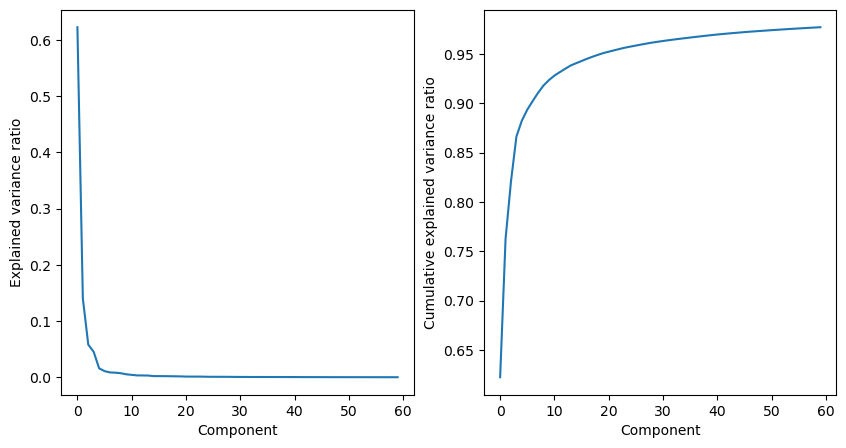

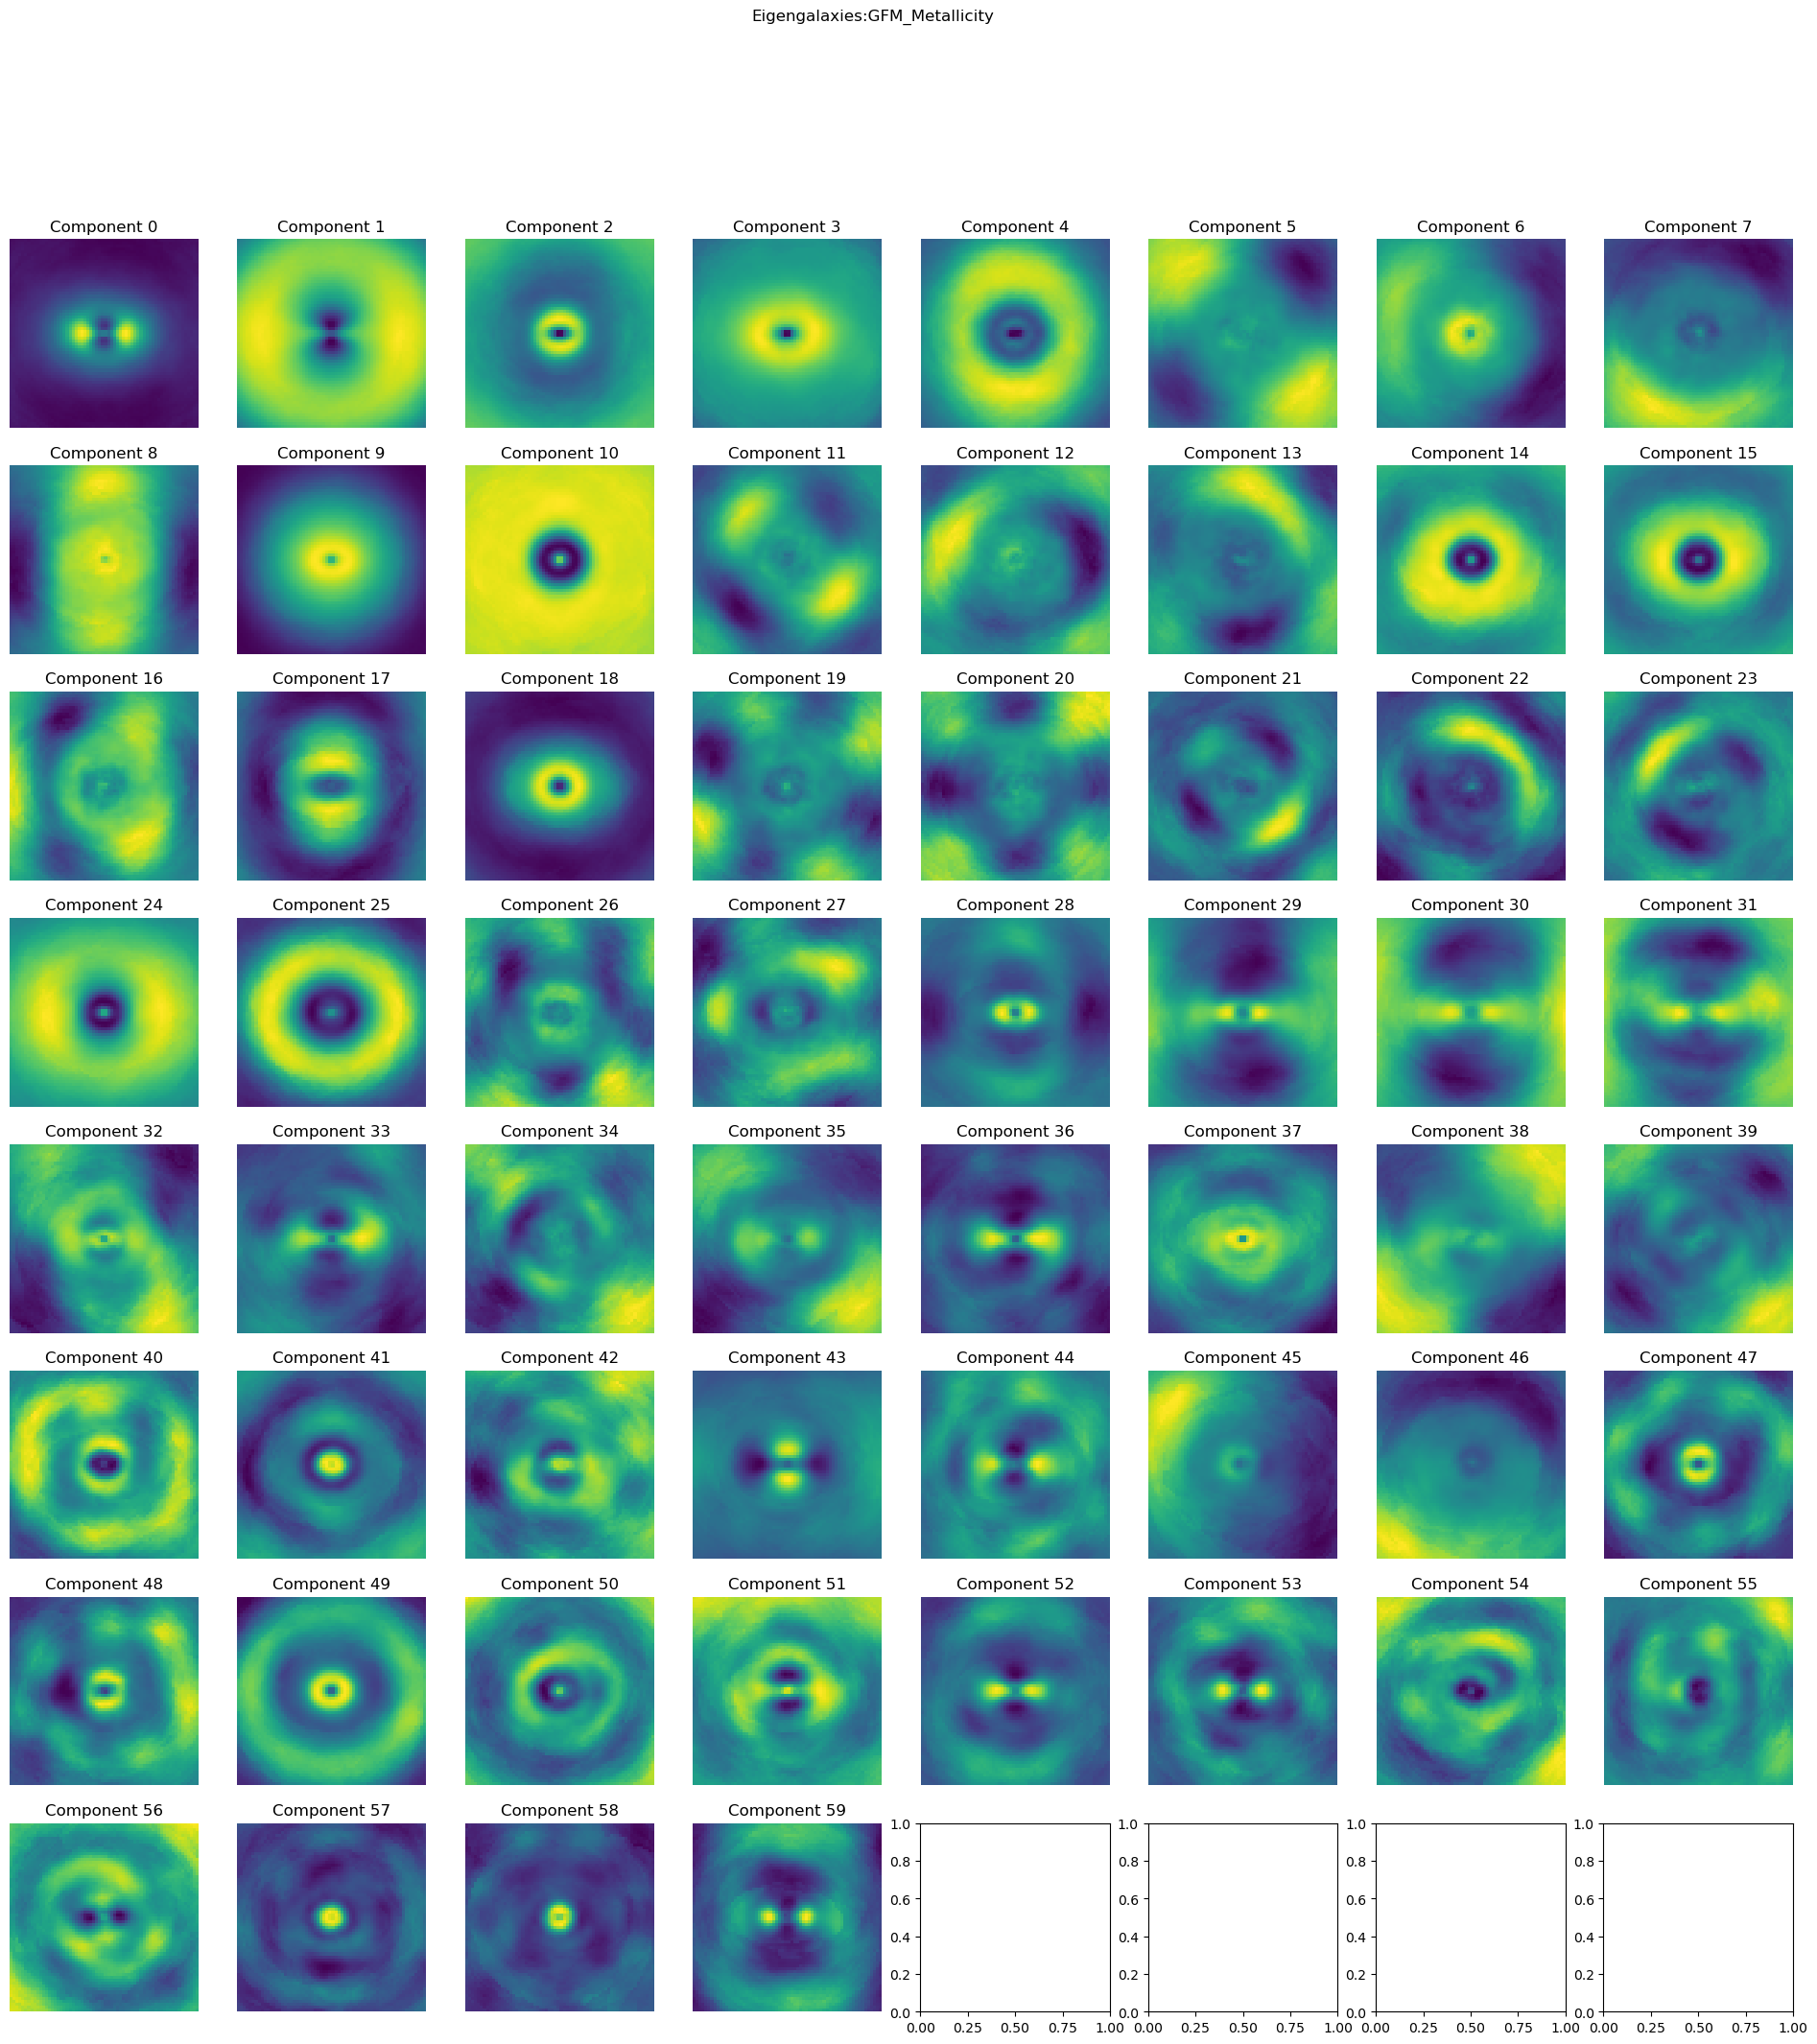

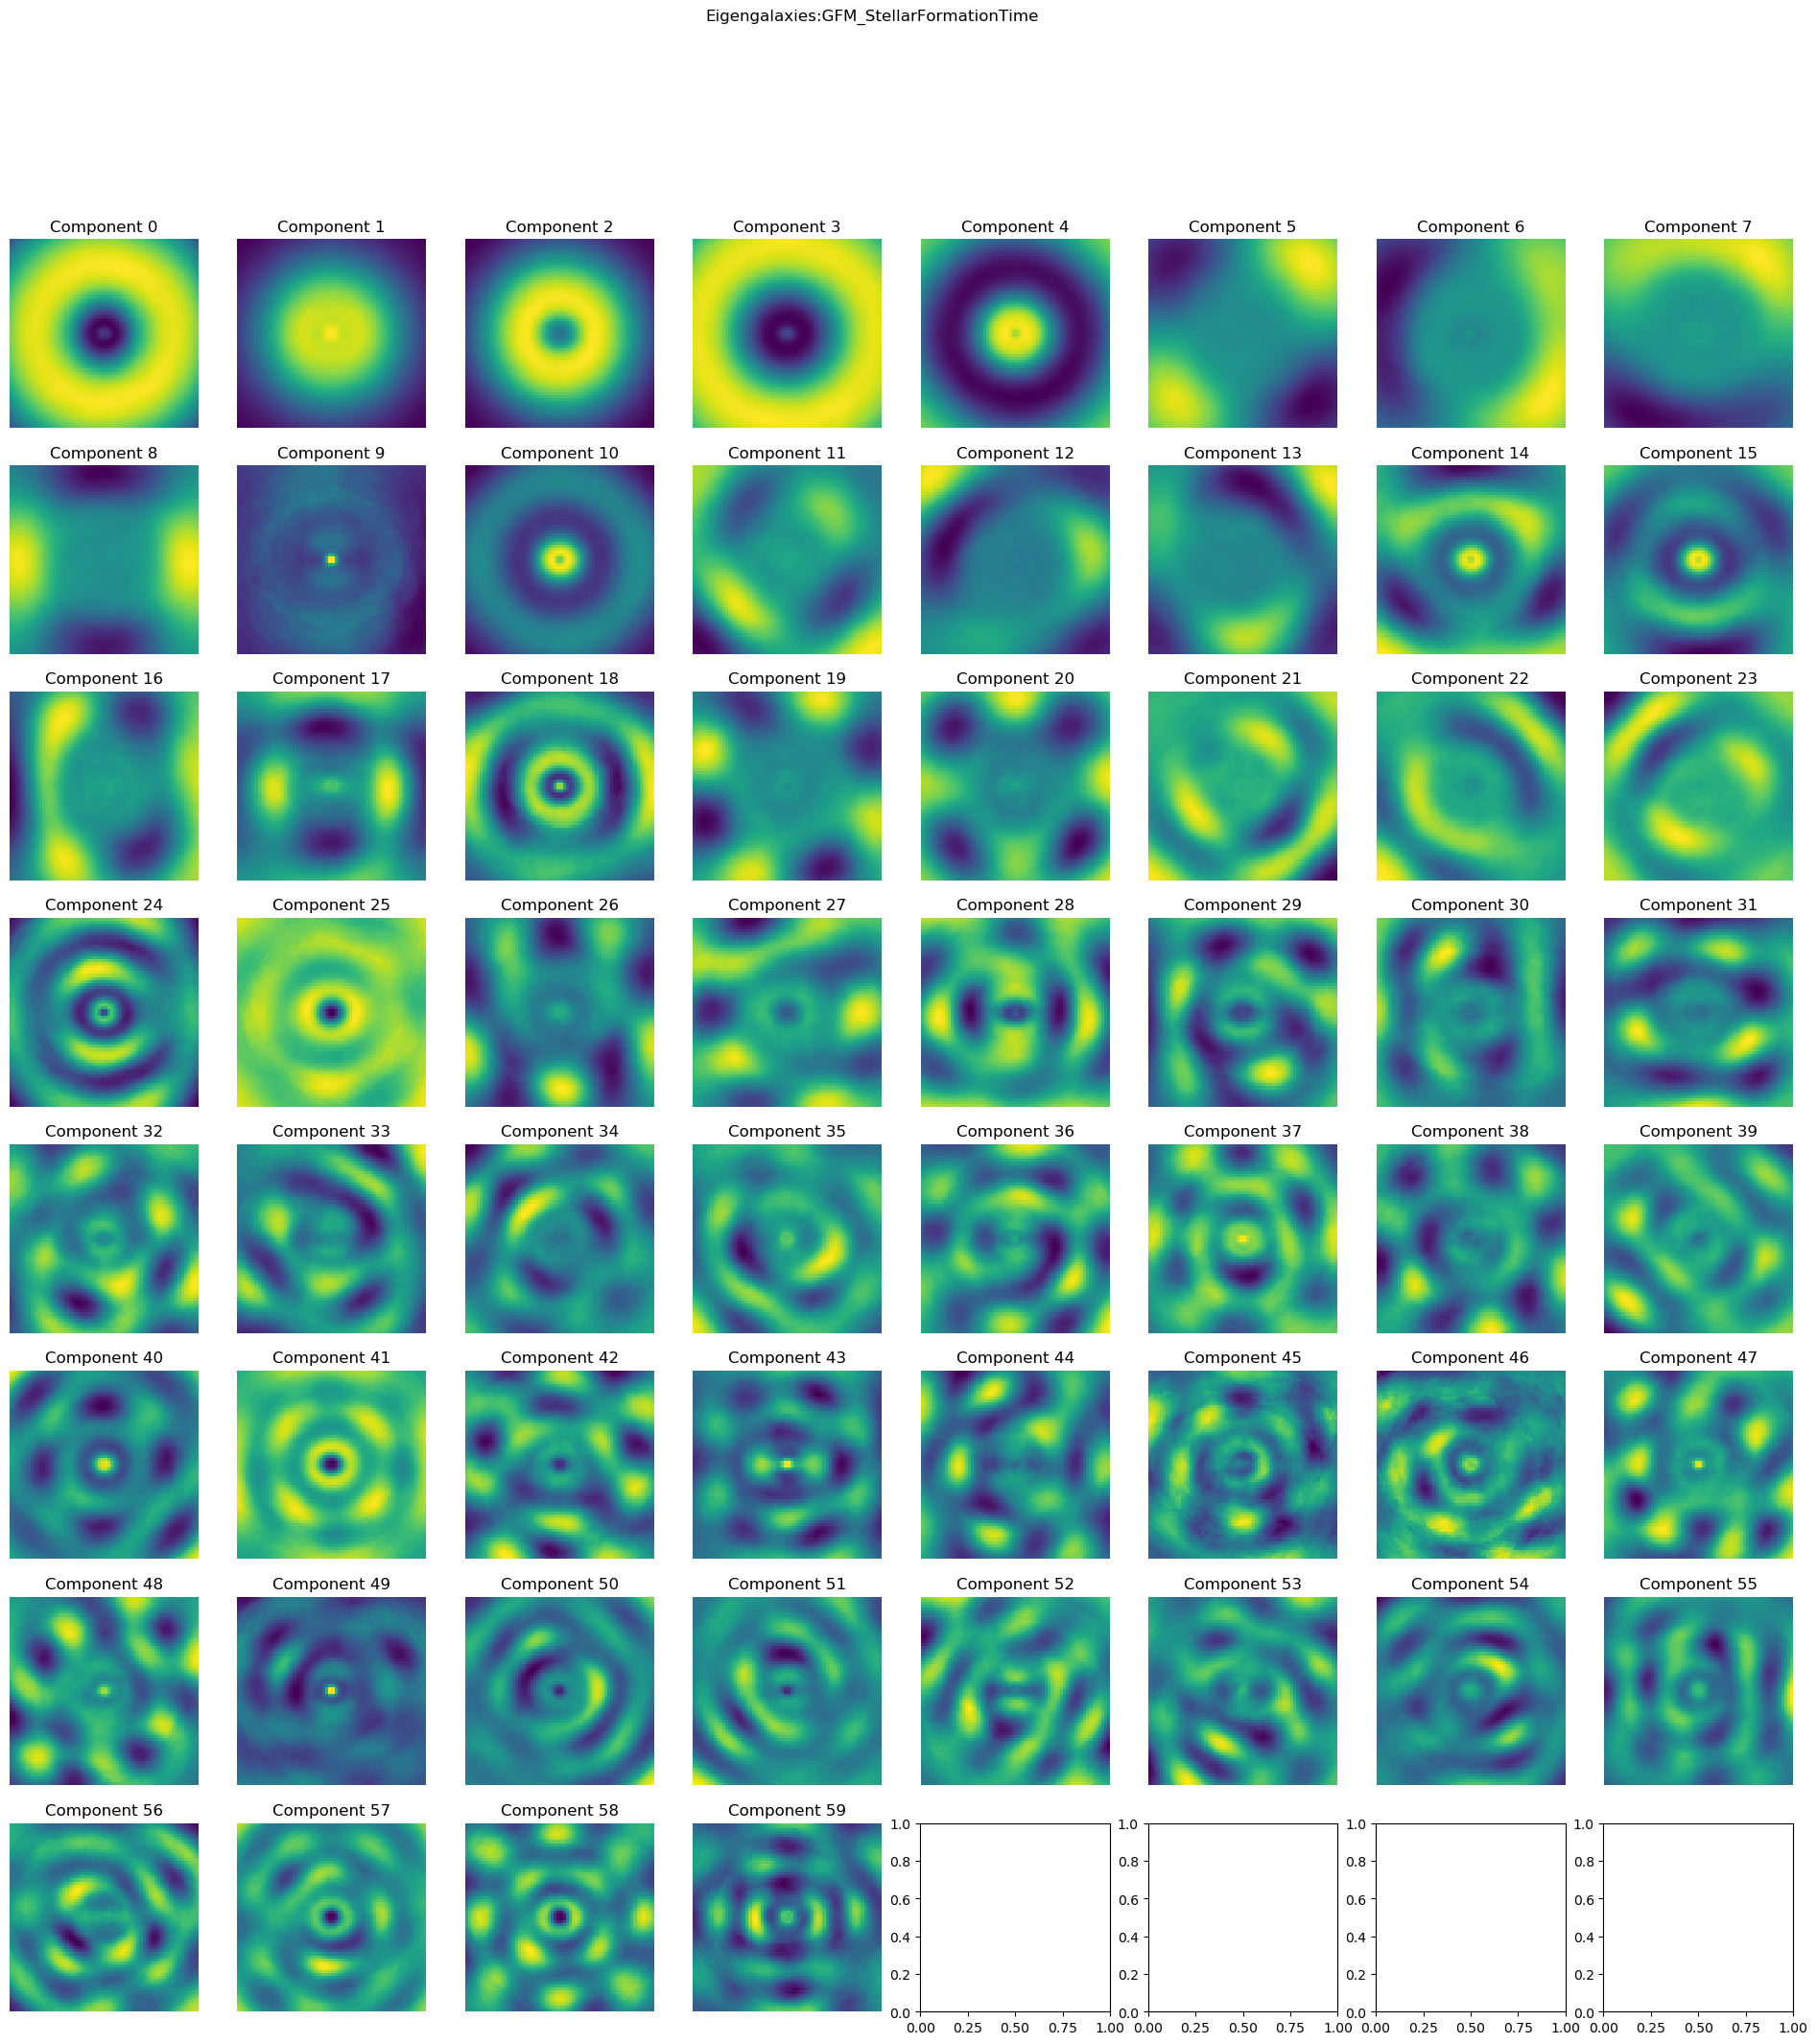

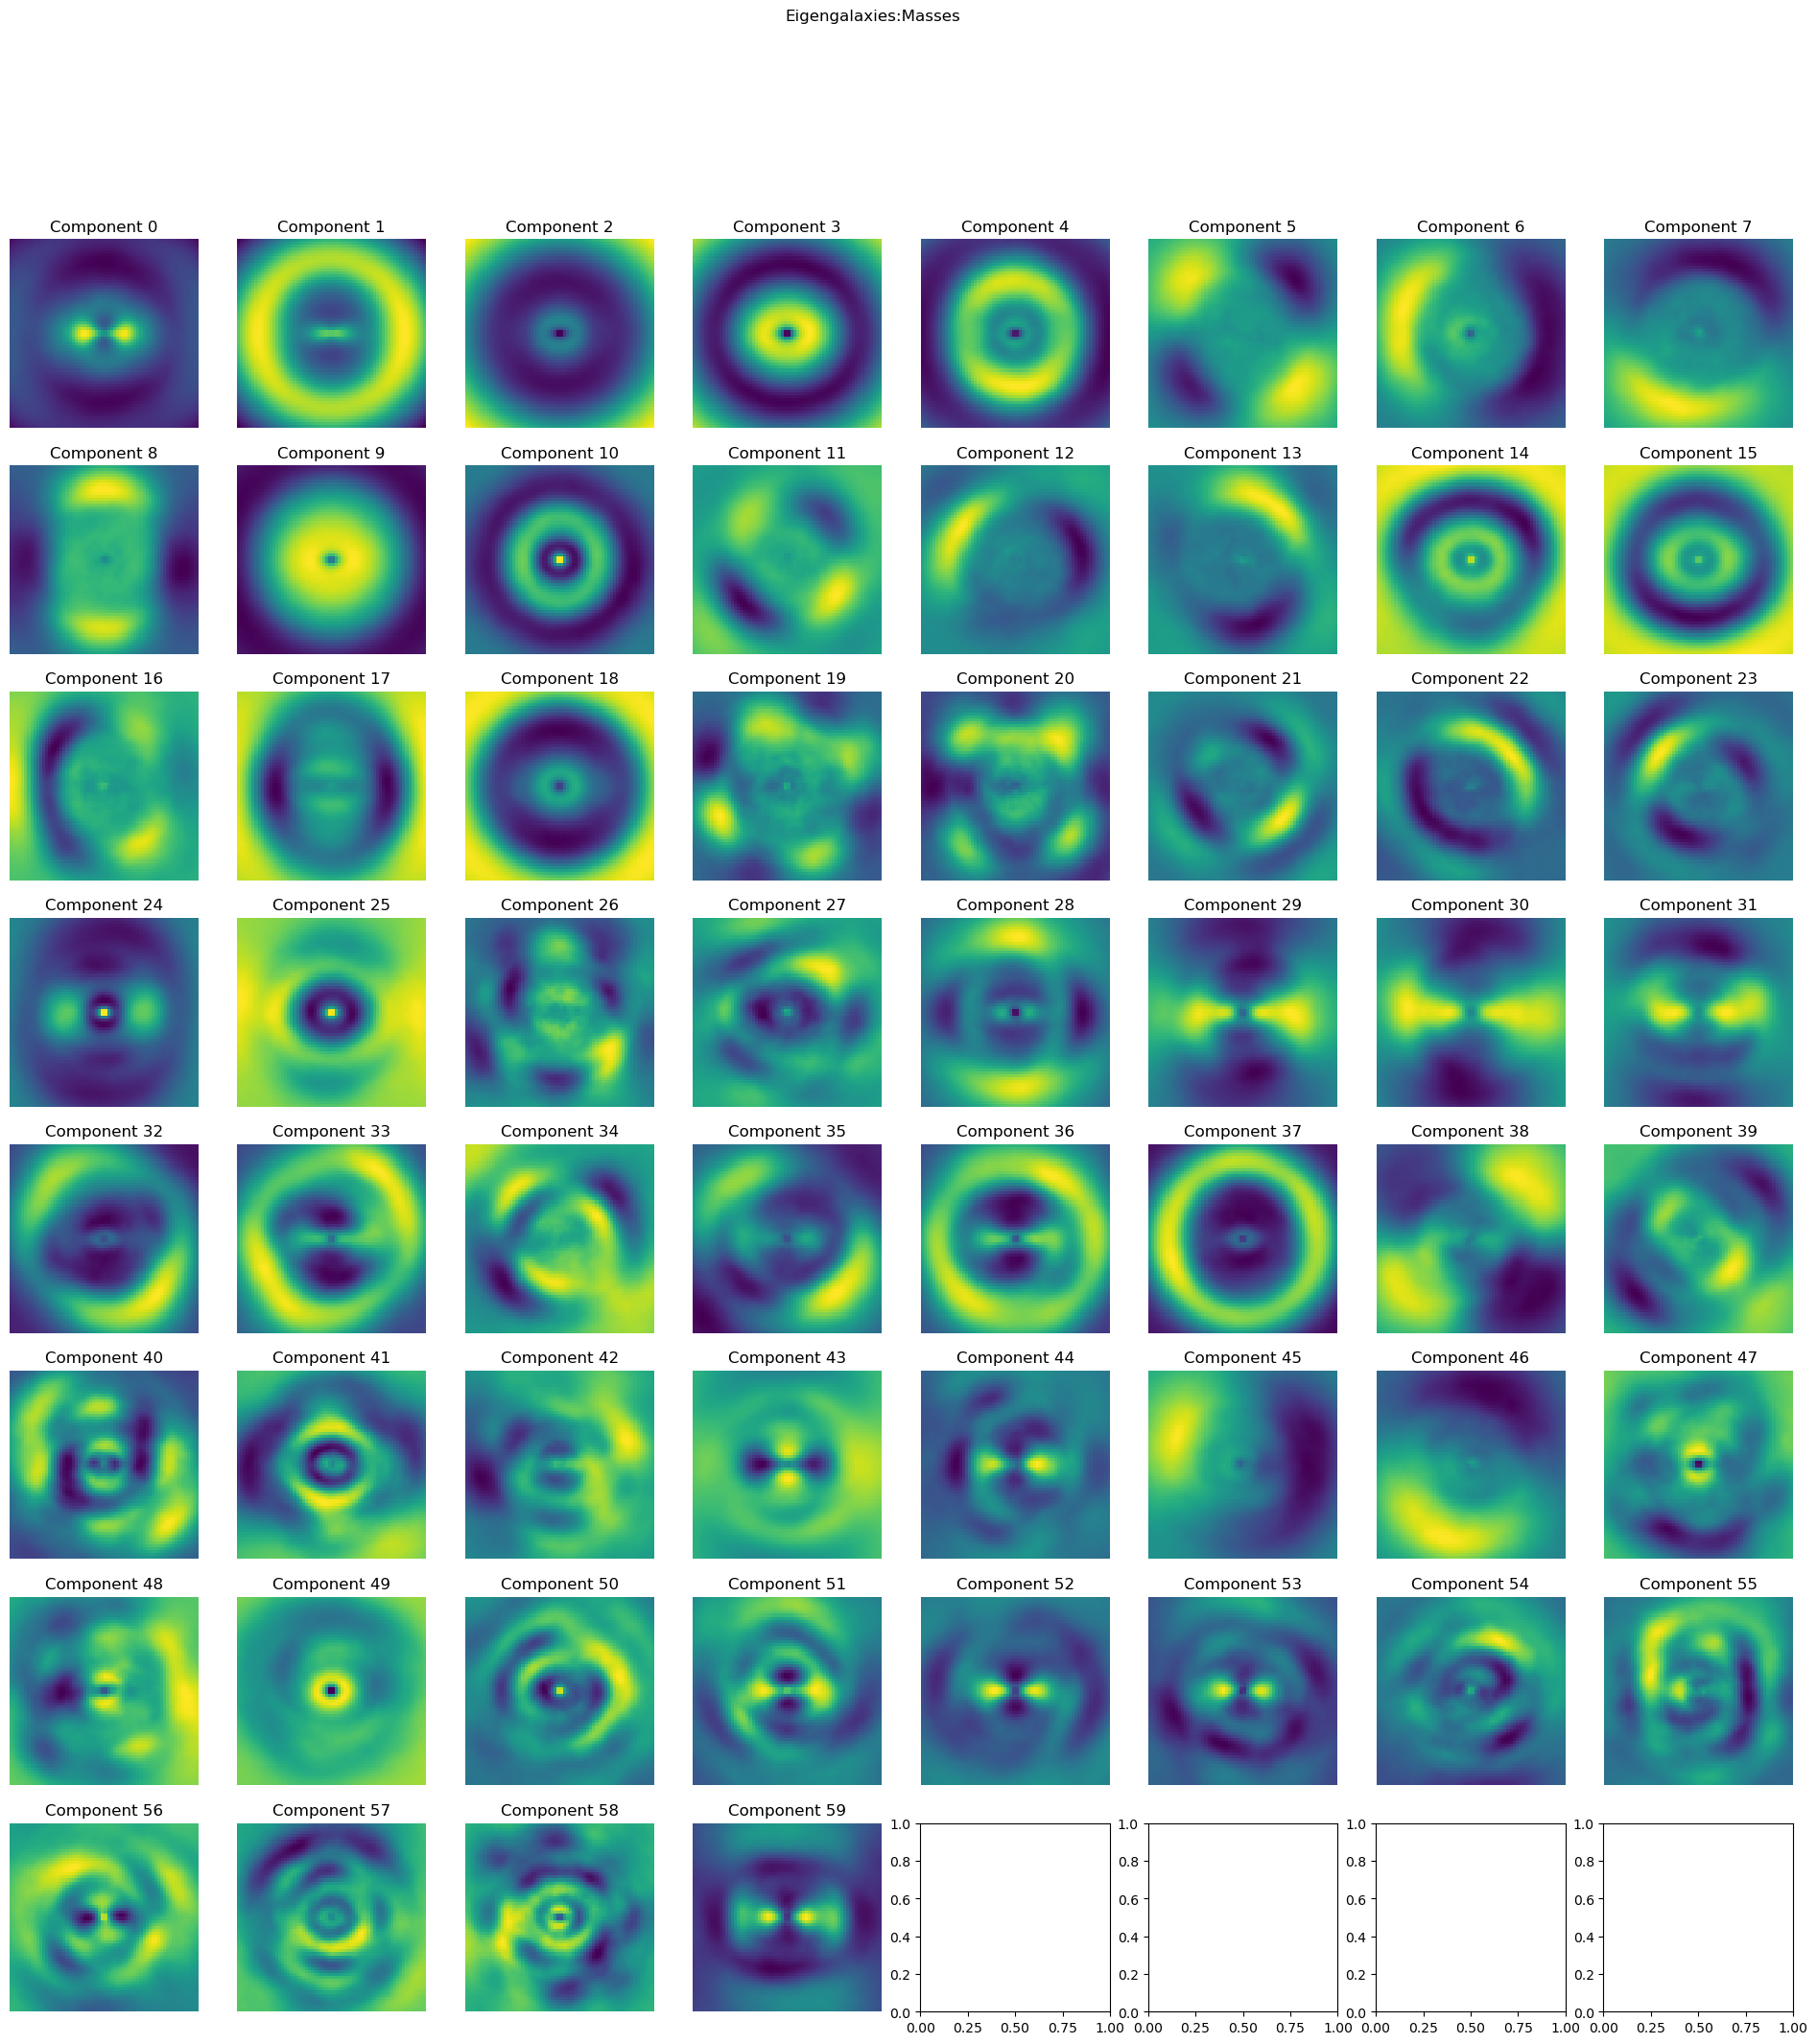

In [14]:
model.fit(n_components=60)

In [15]:
def show_pca_results(self):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(self.pca.explained_variance_ratio_)
    ax[0].set_xlabel("Component")
    ax[0].set_ylabel("Explained variance ratio")
    ax[1].plot(np.cumsum(self.pca.explained_variance_ratio_))
    ax[1].set_xlabel("Component")
    ax[1].set_ylabel("Cumulative explained variance ratio")
    plt.show()
    
    
    field_length = len(self.data._image_fields[self.particle_type]) 
    
    #Loop over different image fields
    for index,field in enumerate(self.data._image_fields[self.particle_type]):

        

        rows = int(np.ceil(np.sqrt(self.pca.n_components)))
        cols = int(np.ceil(self.pca.n_components/rows))
        fig, ax = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
        for i in range(rows):
            for j in range(cols):
                if i*cols+j < self.pca.n_components:
                    ax[i, j].imshow(self.eigengalaxies[i*cols+j][index])
                    ax[i, j].set_title(f"Component {i*cols+j}")
                    ax[i, j].axis("off")
        fig.suptitle(f"Eigengalaxies:{field}")
        plt.show()
        
        
    
  
    # Plot the mean galaxy
    
    fig, ax = plt.subplots(1,field_length, figsize = (field_length*3, 3))
    for index,field in enumerate(self.data._image_fields[self.particle_type]):
        ax[index].imshow(self.pca.mean_.reshape(field_length, *self._IMG_SHAPE)[index])
        ax[index].set_title(f"{field}")
        ax[index].axis("off")
    fig.suptitle("Mean Galaxy")
    plt.show() 
            
            
    #Calculate residue of random galaxy
    randomind = np.random.randint(0, self.datamatrix.shape[0])
    inverse_images = self.inverse_transformed_datamatrix[randomind].reshape(field_length, *self._IMG_SHAPE)
    for index, field in enumerate(self.data._image_fields[self.particle_type]):
        fig, ax = plt.subplots(1, 3, figsize=(6, 3))
        
        original = self.datamatrix[randomind].reshape(field_length, *self._IMG_SHAPE)[index]
        
        ax[0].imshow(original)
        ax[0].set_title(f"Original galaxy")
        ax[0].axis("off")
        ax[1].imshow(inverse_images[index])
        ax[1].set_title(f"Reconstructed galaxy")
        ax[1].axis("off")
        
        # Calculate residue
        residue = np.abs(original - inverse_images[index])
        ax[2].imshow(residue)
        ax[2].set_title(f"Residue")
        ax[2].axis("off")
        
        fig.suptitle(f"Comparison of {field} field")
        plt.show()

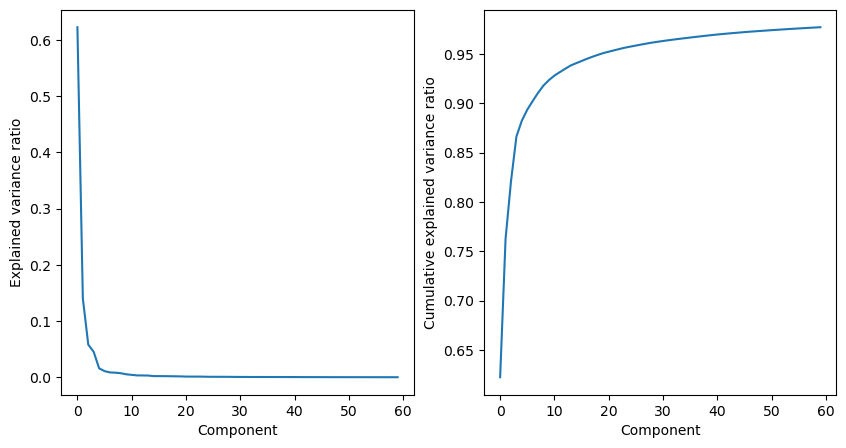

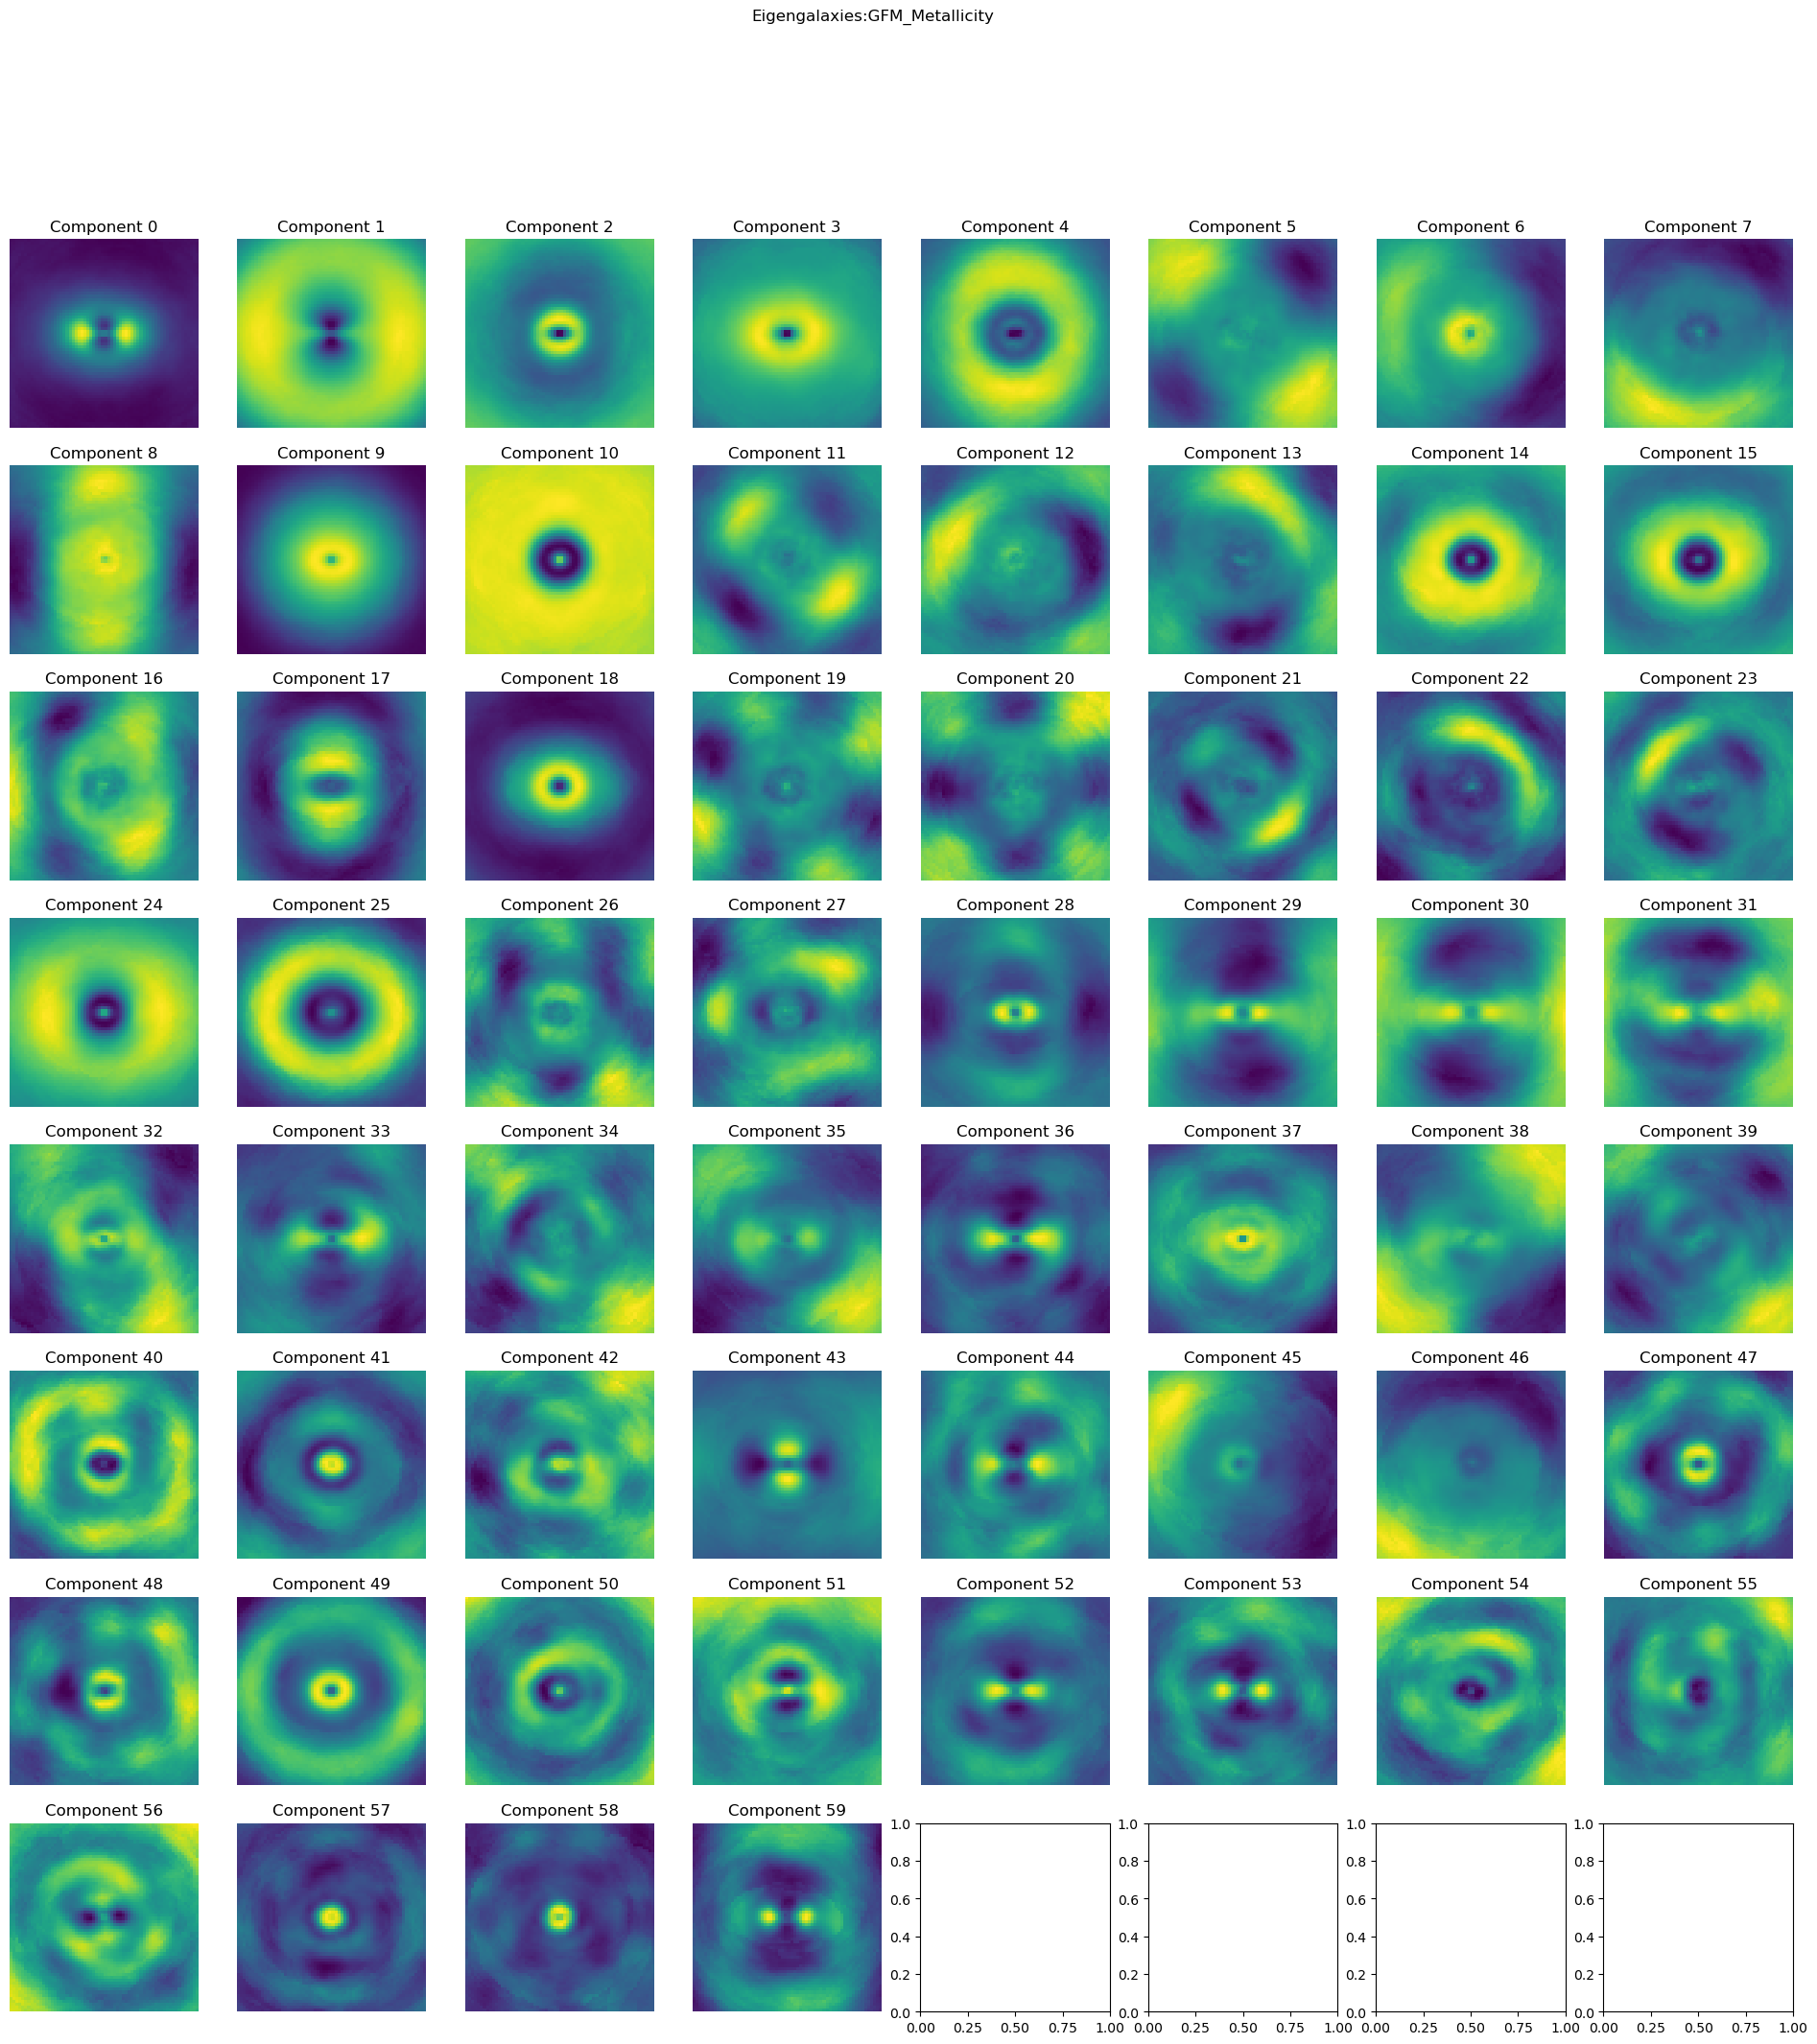

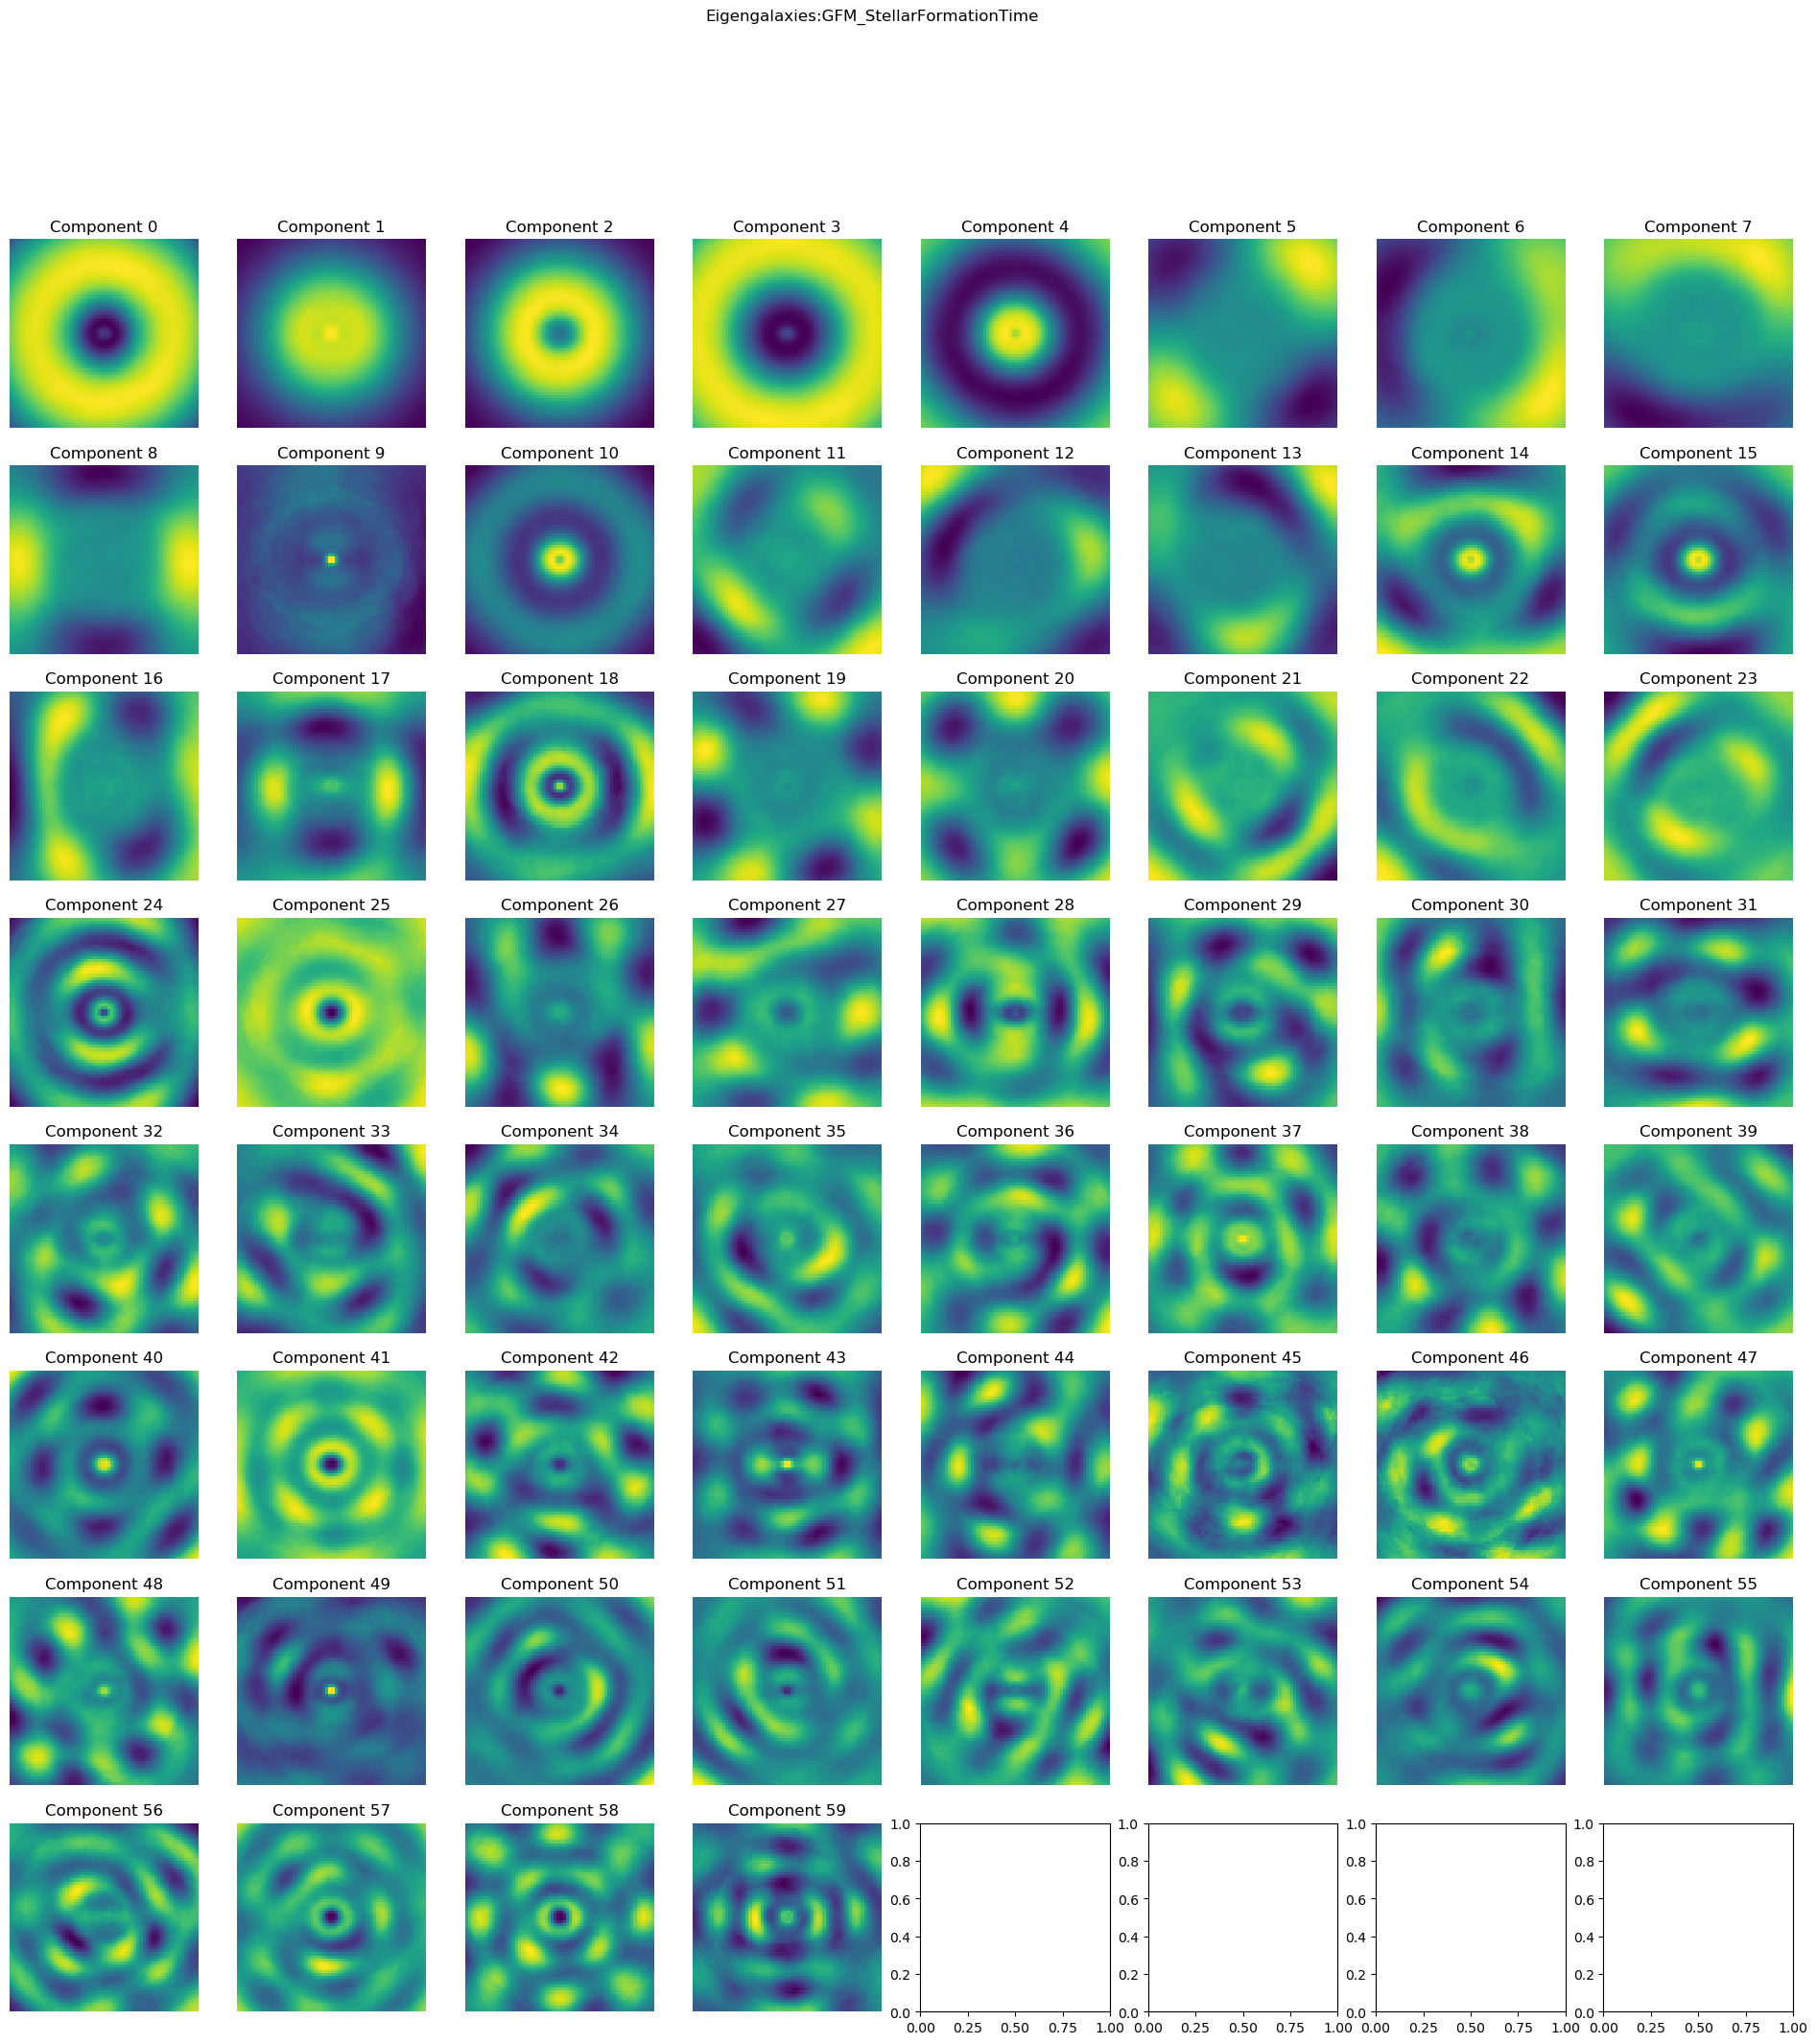

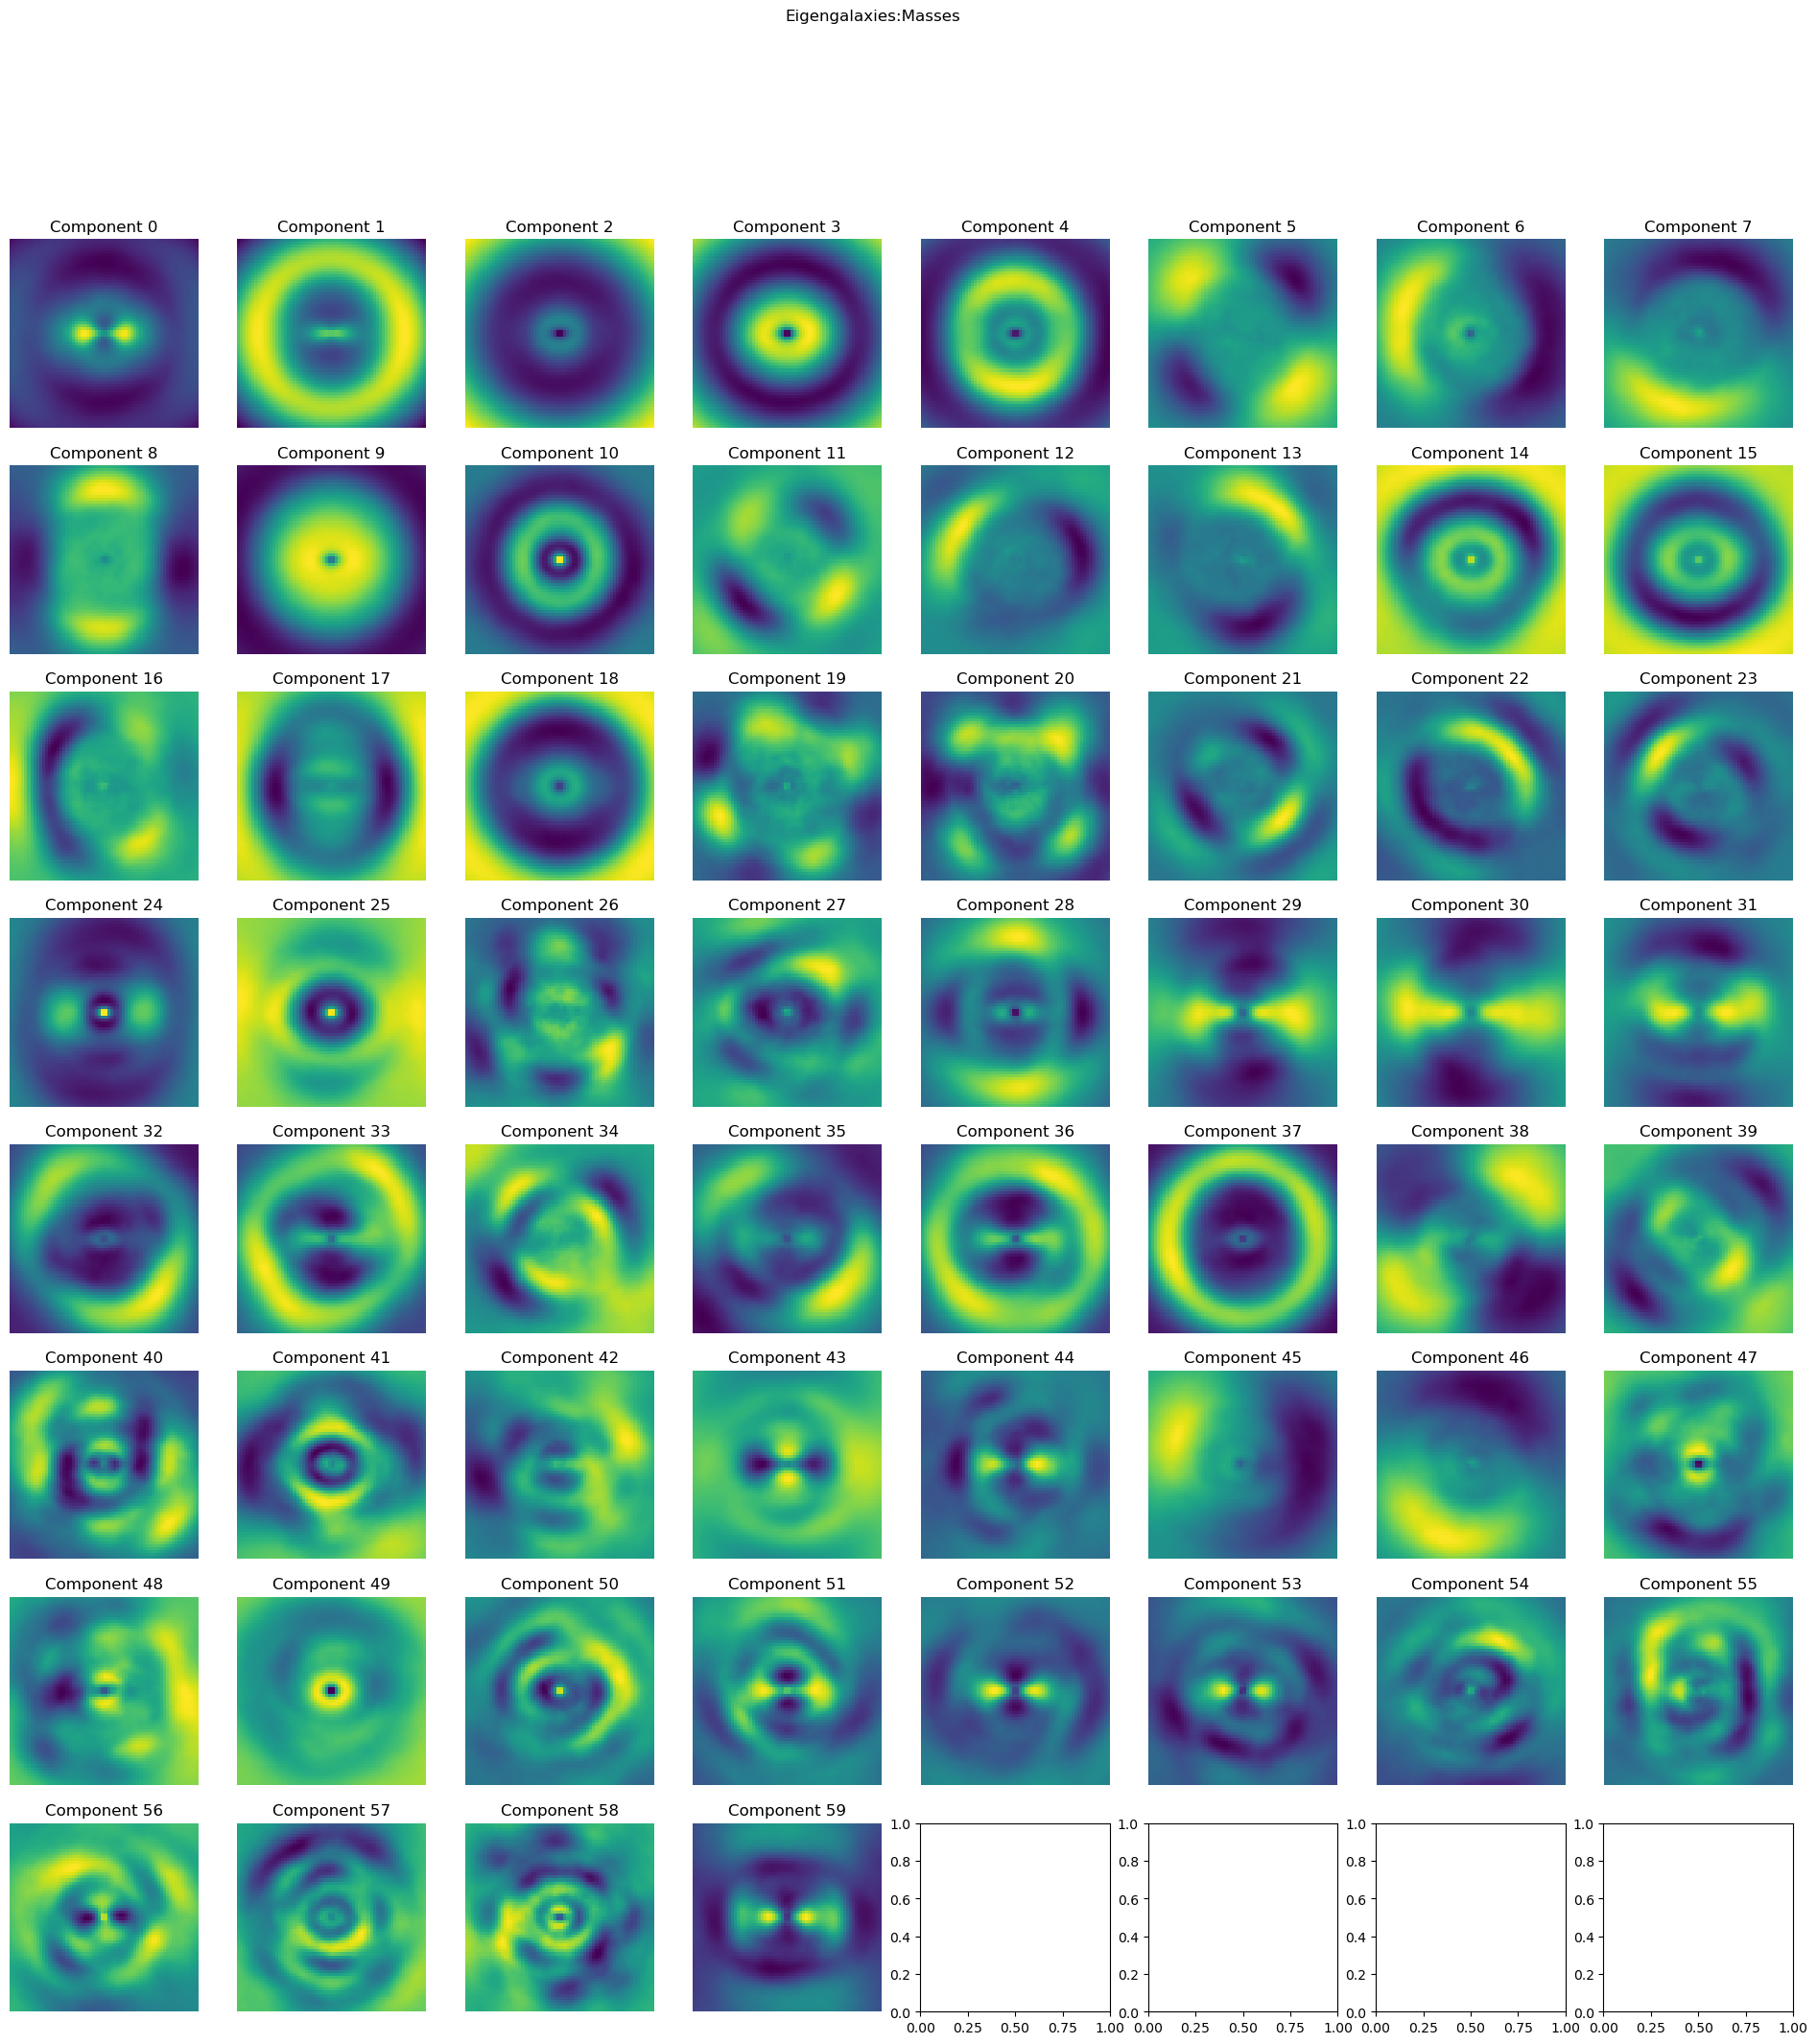

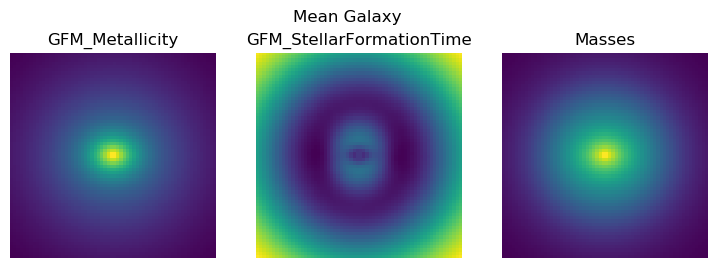

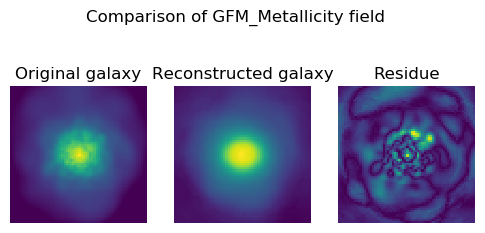

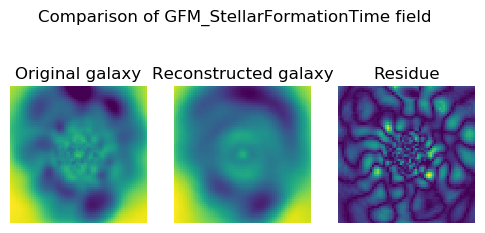

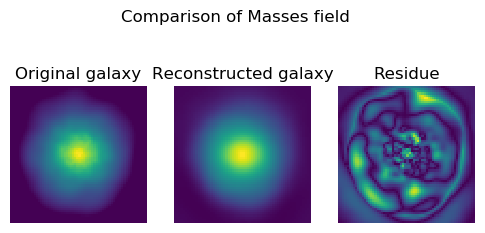

In [16]:
show_pca_results(model)

In [18]:
model

NameError: name 'mode' is not defined

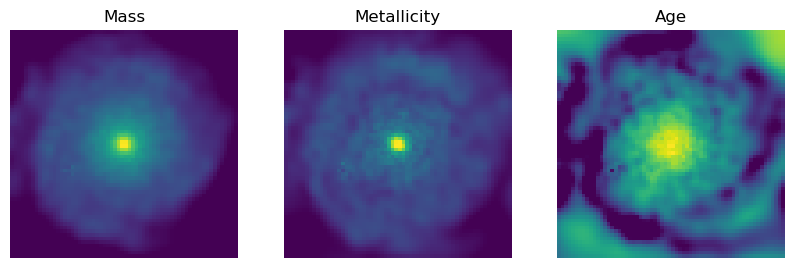

In [17]:
mass = data.get_image(field="Masses", particle_type="stars", index = 20)
metal = data.get_image(field="GFM_Metallicity", particle_type="stars", index = 20)
age = data.get_image(field= "GFM_StellarFormationTime", particle_type="stars", index = 20)


#plot all three images
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(norm(mass,**norm_function_args["Masses"]))
ax[0].set_title("Mass")
ax[0].axis("off")
ax[1].imshow(norm(metal, **norm_function_args["GFM_Metallicity"]))
ax[1].set_title("Metallicity")
ax[1].axis("off")
ax[2].imshow(norm(age, **norm_function_args["GFM_StellarFormationTime"]))
ax[2].set_title("Age")
ax[2].axis("off")
plt.show()


In [13]:
eigen = model.eigengalaxies

In [14]:
EIGENORDER = model.data._image_fields["stars"]
EIGENORDER

['GFM_Metallicity', 'GFM_StellarFormationTime', 'Masses']

In [15]:
mass_eigen = eigen[:,EIGENORDER.index("Masses")]
metal_eigen = eigen[:,EIGENORDER.index("GFM_Metallicity")]
age_eigen = eigen[:,EIGENORDER.index("GFM_StellarFormationTime")]

In [16]:
mean_img = model.pca.mean_.reshape(3, 64, 64)[EIGENORDER.index("Masses")]
mean_metal_img = model.pca.mean_.reshape(3, 64, 64)[EIGENORDER.index("GFM_Metallicity")]
mean_age_img = model.pca.mean_.reshape(3, 64, 64)[EIGENORDER.index("GFM_StellarFormationTime")]

In [17]:
mass_img_normed = norm(mass, **norm_function_args["Masses"])

In [18]:
model.pca.n_components

150

In [26]:
n_components = model.pca.n_components

mass_img_centered = mass_img_normed - mean_img
mass_img_centered_reshaped = mass_img_centered.reshape(64*64)
mass_eigen_reshaped = mass_eigen.reshape(n_components,64*64)


weights = np.dot(mass_img_centered_reshaped, mass_eigen_reshaped.T)

In [20]:
age_img = norm(age, **norm_function_args["GFM_StellarFormationTime"]) - mean_age_img

weights = np.dot(age_img.flatten(), age_eigen.reshape(n_components,64*64).T)

In [21]:
mass_eigen.shape

(150, 64, 64)

(-0.5, 63.5, 63.5, -0.5)

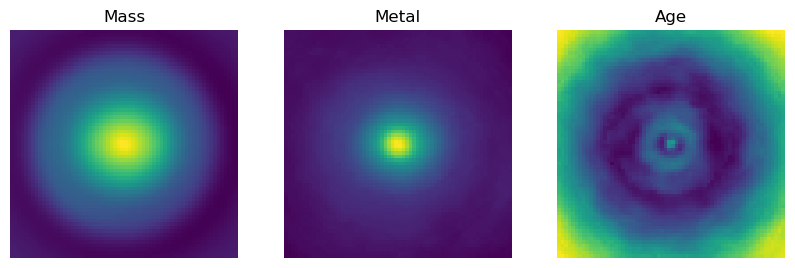

In [27]:
reconstruction_mass_img = np.dot(weights, mass_eigen.reshape(n_components,64*64)) + mean_img.flatten()
reconstruction_metal_img = np.dot(weights, metal_eigen.reshape(n_components,64*64)) + mean_metal_img.flatten()
reconstruction_age_img = np.dot(weights, age_eigen.reshape(n_components,64*64)) + mean_age_img.flatten()


# show the reconstructed images

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(reconstruction_mass_img.reshape(64,64))
ax[0].set_title("Mass")
ax[0].axis("off")

ax[1].imshow(reconstruction_metal_img.reshape(64,64))
ax[1].set_title("Metal")
ax[1].axis("off")


ax[2].imshow(reconstruction_age_img.reshape(64,64))
ax[2].set_title("Age")
ax[2].axis("off")



(-0.5, 63.5, 63.5, -0.5)

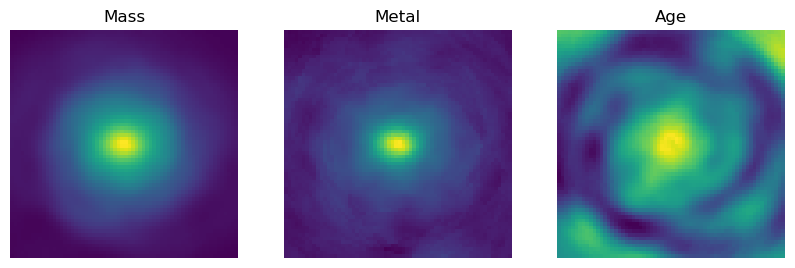

In [23]:
reconstruction_mass_img = np.dot(weights, mass_eigen.reshape(n_components,64*64)) + mean_img.flatten()
reconstruction_metal_img = np.dot(weights, metal_eigen.reshape(n_components,64*64)) + mean_metal_img.flatten()
reconstruction_age_img = np.dot(weights, age_eigen.reshape(n_components,64*64)) + mean_age_img.flatten()


# show the reconstructed images

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(reconstruction_mass_img.reshape(64,64))
ax[0].set_title("Mass")
ax[0].axis("off")

ax[1].imshow(reconstruction_metal_img.reshape(64,64))
ax[1].set_title("Metal")
ax[1].axis("off")


ax[2].imshow(reconstruction_age_img.reshape(64,64))
ax[2].set_title("Age")
ax[2].axis("off")



In [24]:
def compare(self, index = None):
    field_length = len(self.data._image_fields[self.particle_type])
     #Calculate residue of random galaxy
    if index is None:
        randomind = np.random.randint(0, self.datamatrix.shape[0])
    else:
        randomind = index
    inverse_images = self.inverse_transformed_datamatrix[randomind].reshape(field_length, *self._IMG_SHAPE)
    for index, field in enumerate(self.data._image_fields[self.particle_type]):
        fig, ax = plt.subplots(1, 3, figsize=(6, 3))
        
        original = self.datamatrix[randomind].reshape(field_length, *self._IMG_SHAPE)[index]
        
        ax[0].imshow(original)
        ax[0].set_title(f"Original galaxy")
        ax[0].axis("off")
        ax[1].imshow(inverse_images[index])
        ax[1].set_title(f"Reconstructed galaxy")
        ax[1].axis("off")
        
        # Calculate residue
        residue = np.abs(original - inverse_images[index])
        ax[2].imshow(residue)
        ax[2].set_title(f"Residue")
        ax[2].axis("off")
        
        fig.suptitle(f"Comparison of {field} field")
        plt.show()

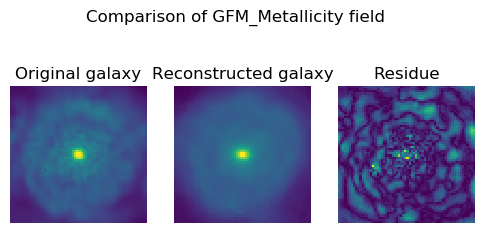

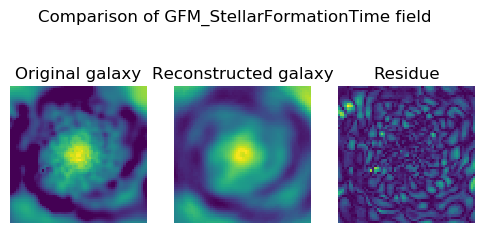

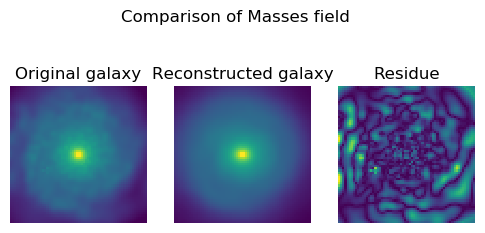

In [25]:
compare(model,20)